## MAB with 5 arms
- Each arm returns reward `1` with given probability

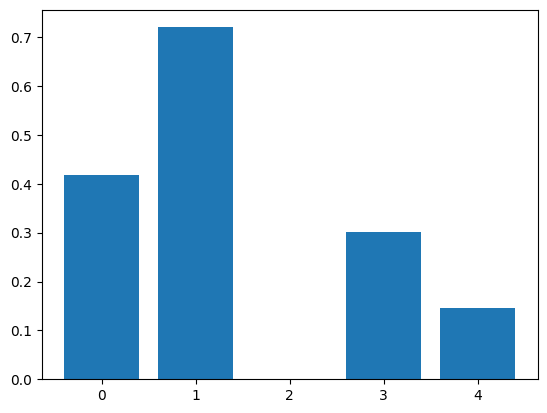

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1)
num_arms = 5
reward_probs = np.random.uniform(0, 1, num_arms)
labels = [str(x) for x in range(num_arms)]
plt.bar(labels, reward_probs)
plt.show()


print(reward_probs)

## 0. MAB Env

In [5]:
class MAB:
    def __init__(self, reward_probs):
        self.reward_probs = reward_probs
        
    def pull_arm(self, arm):
        reward = np.random.choice([0, 1], p=[1-self.reward_probs[arm], self.reward_probs[arm]])
        return reward

In [11]:
myMAB = MAB(reward_probs)
trials = 10
total = 0
for _ in range(trials):
    total += myMAB.pull_arm(3)

print(total/trials)

0.7


## 1. Random Play
- Only exploration with no explotation

0.3812


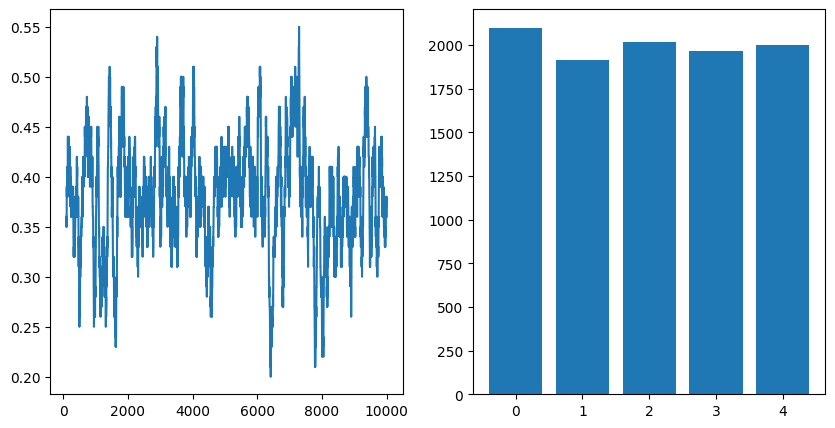

In [20]:
trials = 10000
total = 0
rewards = []
cnts = np.zeros(num_arms)
for _ in range(trials):
    arm = np.random.choice(num_arms)
    reward = myMAB.pull_arm(arm)
    rewards.append(reward)
    total += reward
    cnts[arm] += 1
    
print(total/trials)

fig, axes  = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(pd.Series(rewards).rolling(100).mean()[100:])
axes[1].bar(labels, cnts)
plt.show()

## 2. $\epsilon$-Greedy

0.723


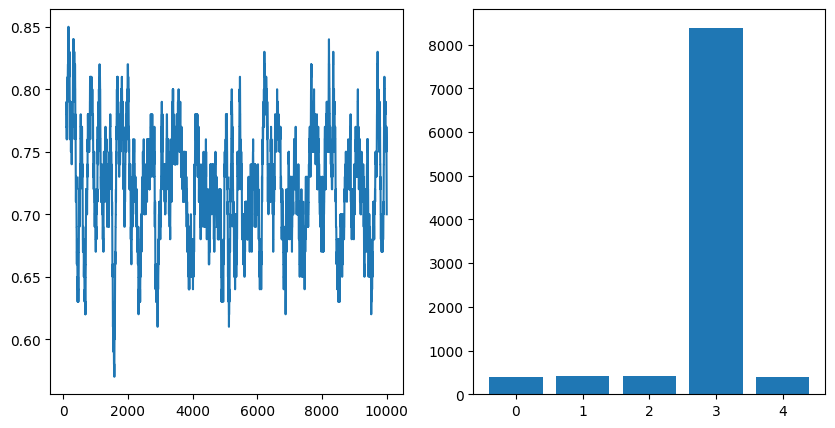

In [21]:
trials = 10000
total = 0
epsilon = 0.2
rewards = []
cnts = np.zeros(num_arms)
est_mean_rewards = np.zeros(num_arms)
for _ in range(trials):
    # 1. Choose an arm with e
    p = np.random.random() #0~1
    if p < epsilon:
        arm = np.random.choice(num_arms)
    else:
        arm_indices = np.where( est_mean_rewards == est_mean_rewards.max() ) [0]
        arm = np.random.choice(arm_indices)

    reward = myMAB.pull_arm(arm)        
    rewards.append(reward)
    total += reward
    cnts[arm] += 1
    
    #2. Update Q
    est_mean_rewards[arm] = est_mean_rewards[arm] + (reward - est_mean_rewards[arm]) / cnts[arm]
    
print(total/trials)

fig, axes  = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(pd.Series(rewards).rolling(100).mean()[100:])
axes[1].bar(labels, cnts)
plt.show()


0.7628


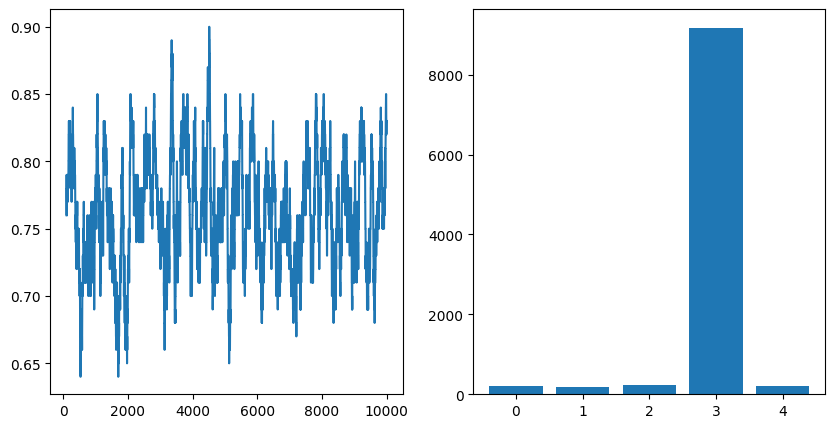

In [22]:
trials = 10000
total = 0
epsilon = 0.1
rewards = []
cnts = np.zeros(num_arms)
est_mean_rewards = np.zeros(num_arms)
for _ in range(trials):
    # 1. Choose an arm with e
    p = np.random.random() #0~1
    if p < epsilon:
        arm = np.random.choice(num_arms)
    else:
        arm_indices = np.where( est_mean_rewards == est_mean_rewards.max() ) [0]
        arm = np.random.choice(arm_indices)

    reward = myMAB.pull_arm(arm)        
    rewards.append(reward)
    total += reward
    cnts[arm] += 1
    
    #2. Update Q
    est_mean_rewards[arm] = est_mean_rewards[arm] + (reward - est_mean_rewards[arm]) / cnts[arm]
    
print(total/trials)

fig, axes  = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(pd.Series(rewards).rolling(100).mean()[100:])
axes[1].bar(labels, cnts)
plt.show()


## 3. Decreasing $\epsilon$ Greedy

0.8109


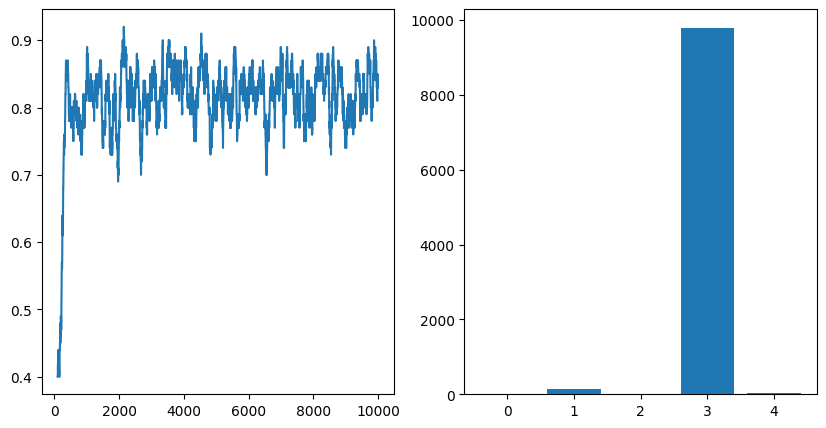

In [24]:
trials = 10000
total = 0
epsilon = 0.5
alpha = 0.99
rewards = []
cnts = np.zeros(num_arms)
est_mean_rewards = np.zeros(num_arms)
for _ in range(trials):
    # 1. Choose an arm with e
    p = np.random.random() #0~1
    if p < epsilon:
        arm = np.random.choice(num_arms)
    else:
        arm_indices = np.where( est_mean_rewards == est_mean_rewards.max() ) [0]
        arm = np.random.choice(arm_indices)

    reward = myMAB.pull_arm(arm)        
    rewards.append(reward)
    total += reward
    cnts[arm] += 1
    
    #2. Update Q
    est_mean_rewards[arm] = est_mean_rewards[arm] + (reward - est_mean_rewards[arm]) / cnts[arm]
    epsilon *= alpha
print(total/trials)

fig, axes  = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(pd.Series(rewards).rolling(100).mean()[100:])
axes[1].bar(labels, cnts)
plt.show()


In [27]:
best_score = reward_probs.max()
print(best_score)

0.8144306894210062
